In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set

<function seaborn.rcmod.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)>

In [2]:
w_happiness = pd.read_csv('2017.csv')
w_economic = pd.read_csv('economic_freedom_index2019_data.csv',  encoding='latin-1')
w_human = pd.read_csv('hfi_cc_2018.csv')
gdp = pd.read_csv('API_NY.GDP.PCAP.PP.CD_DS2_en_csv_v2_41041.csv', skiprows=3)
gini = pd.read_csv('API_SI.POV.GINI_DS2_en_csv_v2_41010.csv', skiprows=3)

In [3]:
w_happiness = w_happiness[['Country', 'Happiness.Rank', 'Happiness.Score']]
w_happiness.head(3)
#Y = 2017

,Country,Happiness.Rank,Happiness.Score
0,Norway,1,7.537
1,Denmark,2,7.522
2,Iceland,3,7.504


In [4]:
w_economic = w_economic[['Country Name','World Rank', 'Unemployment (%)', 'GDP Growth Rate (%)', '2019 Score']].sort_values('World Rank').reset_index(drop = True)
w_economic.head(3)
#Y = 2019

,Country Name,World Rank,Unemployment (%),GDP Growth Rate (%),2019 Score
0,Hong Kong,1.0,3.1,3.8,90.2
1,Singapore,2.0,2.0,3.6,89.4
2,New Zealand,3.0,4.9,3.0,84.4


In [5]:
w_human = w_human[['countries', 'hf_rank', 'hf_score',]].loc[w_human['year'] == 2016].sort_values('hf_rank').reset_index(drop = True)
w_human.head(3)
#Y = 2016

,countries,hf_rank,hf_score
0,New Zealand,1.0,8.887410
1,Switzerland,2.0,8.787759
2,Hong Kong,3.0,8.776840


In [6]:
gdp = gdp[['Country Name', '2018']]
gdp = gdp.dropna()
gdp = gdp.astype({"Country Name": object, "2018": int})
gdp.head(3)

,Country Name,2018
1,Afghanistan,1951
2,Angola,6440
5,Arab World,17557


In [7]:
gini =gini[['Country Name','2010']]
gini = gini.dropna().reset_index(drop = True)
gini.head(3)
#Y = 2010

,Country Name,2010
0,Argentina,43.0
1,Armenia,30.0
2,Australia,34.7


In [8]:
merge1 = pd.merge(w_happiness, w_economic, how='left', left_on=['Country'], right_on=['Country Name'])
merge1 = merge1.dropna()
merge1.head()

,Country,Happiness.Rank,Happiness.Score,Country Name,World Rank,Unemployment (%),GDP Growth Rate (%),2019 Score
0,Norway,1,7.537,Norway,26.0,4.2,1.8,73.0
1,Denmark,2,7.522,Denmark,14.0,5.7,2.1,76.7
2,Iceland,3,7.504,Iceland,11.0,2.8,3.6,77.1
3,Switzerland,4,7.494,Switzerland,4.0,4.8,1.1,81.9
4,Finland,5,7.469,Finland,20.0,8.6,3.0,74.9


In [9]:
merge2 = pd.merge(merge1, w_human, how='left', left_on=['Country Name'], right_on=['countries'])
merge2.head()

,Country,Happiness.Rank,Happiness.Score,Country Name,World Rank,Unemployment (%),GDP Growth Rate (%),2019 Score,countries,hf_rank,hf_score
0,Norway,1,7.537,Norway,26.0,4.2,1.8,73.0,Norway,10.0,8.471241
1,Denmark,2,7.522,Denmark,14.0,5.7,2.1,76.7,Denmark,6.0,8.547820
2,Iceland,3,7.504,Iceland,11.0,2.8,3.6,77.1,Iceland,27.0,8.151753
3,Switzerland,4,7.494,Switzerland,4.0,4.8,1.1,81.9,Switzerland,2.0,8.787759
4,Finland,5,7.469,Finland,20.0,8.6,3.0,74.9,Finland,10.0,8.472184


In [10]:
merge3 = pd.merge(merge2, gdp, how='left', left_on=['Country Name'], right_on=['Country Name'])
merge3 = merge3.dropna().drop('Country', axis = 1)
merge3.head()

,Happiness.Rank,Happiness.Score,Country Name,World Rank,Unemployment (%),GDP Growth Rate (%),2019 Score,countries,hf_rank,hf_score,2018
0,1,7.537,Norway,26.0,4.2,1.8,73.0,Norway,10.0,8.471241,63756.0
1,2,7.522,Denmark,14.0,5.7,2.1,76.7,Denmark,6.0,8.547820,56120.0
2,3,7.504,Iceland,11.0,2.8,3.6,77.1,Iceland,27.0,8.151753,57597.0
3,4,7.494,Switzerland,4.0,4.8,1.1,81.9,Switzerland,2.0,8.787759,68943.0
4,5,7.469,Finland,20.0,8.6,3.0,74.9,Finland,10.0,8.472184,48635.0


In [11]:
final_tab = pd.merge(merge3, gini, how='left', left_on=['Country Name'], right_on=['Country Name'])
final_tab = final_tab.rename(columns={"Country Name": "country", "2010": "gini", "2018": "gdp_ppp","Happiness.Rank": "h_rank","Happiness.Score": "h_score","World Rank": "ef_rank", "GDP Growth Rate (%)": "growth_rate", "Unemployment (%)": "unemployment", '2019 Score':'ef_score'})
final_tab = final_tab.drop('countries', axis = 1)

In [12]:
final_tab = final_tab[['country', 'h_rank', 'hf_rank', 'ef_rank', 'h_score', 'ef_score', 'hf_score',
       'gini', 'unemployment', 'growth_rate', 'gdp_ppp']]
final_tab = final_tab.dropna().reset_index(drop = True)
final_tab['ef_score'] = final_tab['ef_score']/10
final_tab.sort_values('ef_rank')

,country,h_rank,hf_rank,ef_rank,h_score,ef_score,hf_score,gini,unemployment,growth_rate,gdp_ppp
3,Switzerland,4,2.0,4.0,7.494,8.19,8.787759,32.6,4.8,1.1,68943.0
8,Australia,10,4.0,5.0,7.284,8.09,8.582219,34.7,5.6,2.3,51544.0
13,Ireland,15,8.0,6.0,6.977,8.05,8.504565,32.3,6.4,7.8,84069.0
17,United Kingdom,19,8.0,7.0,6.714,7.89,8.497918,34.4,4.3,1.8,46239.0
6,Canada,7,5.0,8.0,7.316,7.77,8.565863,33.6,6.3,3.0,47870.0
2,Iceland,3,27.0,11.0,7.504,7.71,8.151753,26.2,2.8,3.6,57597.0
12,United States,14,17.0,12.0,6.993,7.68,8.388655,40.4,4.4,2.3,62641.0
5,Netherlands,6,6.0,13.0,7.377,7.68,8.554421,27.8,4.8,3.1,56772.0
1,Denmark,2,6.0,14.0,7.522,7.67,8.547820,27.2,5.7,2.1,56120.0
34,Estonia,66,14.0,15.0,5.611,7.66,8.436851,32.0,5.8,4.9,35747.0


In [13]:
corr = final_tab.corr()
corr.style.background_gradient(cmap='coolwarm')

,h_rank,hf_rank,ef_rank,h_score,ef_score,hf_score,gini,growth_rate,gdp_ppp
h_rank,1,0.662503,0.647505,-0.993593,-0.650393,-0.672508,0.28279,0.436157,-0.750669
hf_rank,0.662503,1,0.804672,-0.680897,-0.814261,-0.993922,0.311391,0.431204,-0.770302
ef_rank,0.647505,0.804672,1,-0.66215,-0.985707,-0.798417,0.315703,0.223665,-0.711618
h_score,-0.993593,-0.680897,-0.66215,1,0.673907,0.693794,-0.311903,-0.42614,0.768974
ef_score,-0.650393,-0.814261,-0.985707,0.673907,1,0.81503,-0.336764,-0.216113,0.749231
hf_score,-0.672508,-0.993922,-0.798417,0.693794,0.81503,1,-0.340755,-0.433644,0.801336
gini,0.28279,0.311391,0.315703,-0.311903,-0.336764,-0.340755,1,-0.042458,-0.475954
growth_rate,0.436157,0.431204,0.223665,-0.42614,-0.216113,-0.433644,-0.042458,1,-0.310173
gdp_ppp,-0.750669,-0.770302,-0.711618,0.768974,0.749231,0.801336,-0.475954,-0.310173,1


In [14]:
final_tab.to_csv("final_tab.csv")
final_tab.columns

Index(['country', 'h_rank', 'hf_rank', 'ef_rank', 'h_score', 'ef_score',
       'hf_score', 'gini', 'unemployment', 'growth_rate', 'gdp_ppp'],
      dtype='object')

In [16]:
work = pd.read_csv('final_tab.csv')[['country', 'h_score', 'ef_score',
       'hf_score', 'gini', 'unemployment', 'gdp_ppp']]

In [17]:
work

,country,h_score,ef_score,hf_score,gini,unemployment,gdp_ppp
0,Norway,7.537,7.30,8.471241,25.7,4.2,63756.0
1,Denmark,7.522,7.67,8.547820,27.2,5.7,56120.0
2,Iceland,7.504,7.71,8.151753,26.2,2.8,57597.0
3,Switzerland,7.494,8.19,8.787759,32.6,4.8,68943.0
4,Finland,7.469,7.49,8.472184,27.7,8.6,48635.0
5,Netherlands,7.377,7.68,8.554421,27.8,4.8,56772.0
6,Canada,7.316,7.77,8.565863,33.6,6.3,47870.0
7,Sweden,7.284,7.52,8.387375,27.7,6.7,53119.0
8,Australia,7.284,8.09,8.582219,34.7,5.6,51544.0
9,Israel,7.213,7.28,7.517458,42.6,4.3,40786.0


In [18]:
corr = work.corr()
corr.style.background_gradient(cmap='coolwarm')

,h_score,ef_score,hf_score,gini,unemployment,gdp_ppp
h_score,1,0.673907,0.693794,-0.311903,-0.265216,0.768974
ef_score,0.673907,1,0.81503,-0.336764,-0.189536,0.749231
hf_score,0.693794,0.81503,1,-0.340755,-0.0237826,0.801336
gini,-0.311903,-0.336764,-0.340755,1,0.240294,-0.475954
unemployment,-0.265216,-0.189536,-0.0237826,0.240294,1,-0.118534
gdp_ppp,0.768974,0.749231,0.801336,-0.475954,-0.118534,1


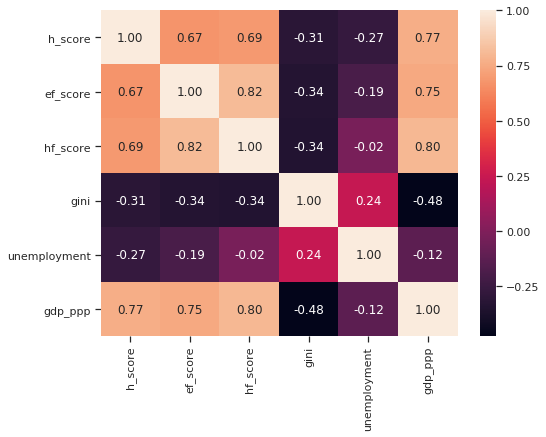

In [19]:
sns.set(style="ticks")
plt.figure(figsize=(8, 6))
sns.heatmap(work.corr(), annot=True, fmt=".2f")
plt.show()

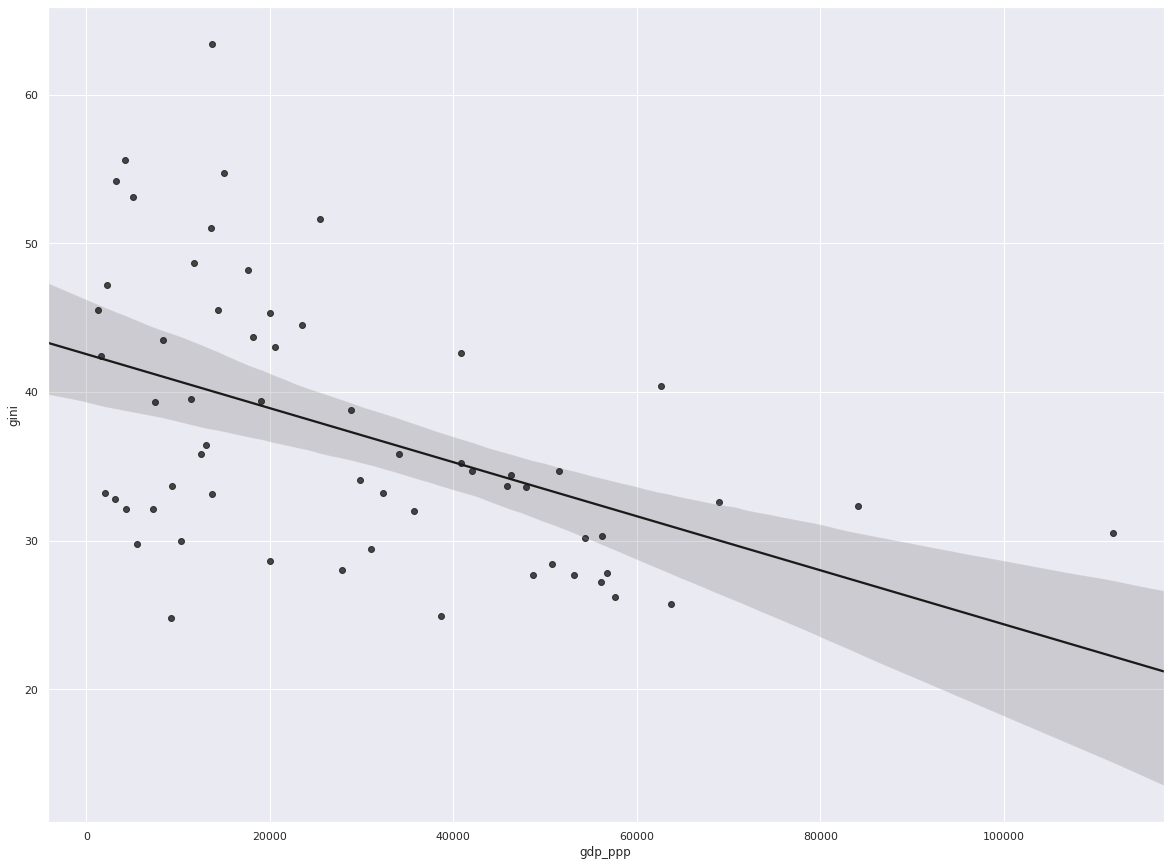

In [20]:
sns.set()
plt.figure(figsize=(20, 15))
sns.regplot("gdp_ppp", "gini", data=work, color="k", label='Gini index')

plt.show()

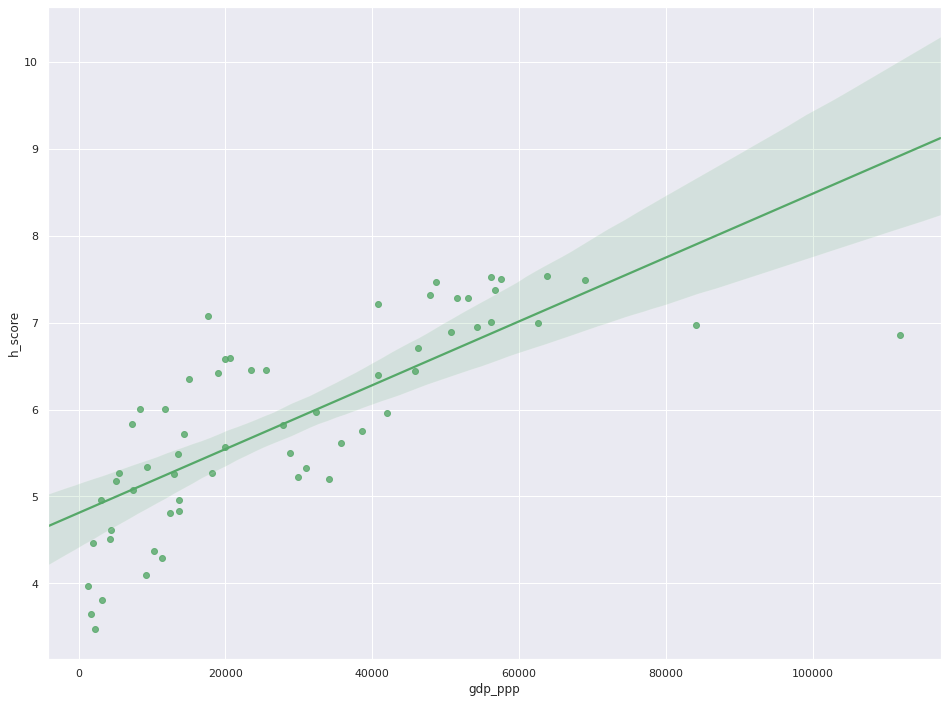

In [21]:
plt.figure(figsize = (16,12))
sns.regplot("gdp_ppp", "h_score", data=work, color="g", label = 'Happiness')
#sns.regplot("gdp_ppp", "hf_score", data=work, color="c", label = 'Social freedom', scatter = False)
#sns.regplot("gdp_ppp", "ef_score", data=work, color="r", label = 'Economic Freedom', scatter = False)

plt.show()

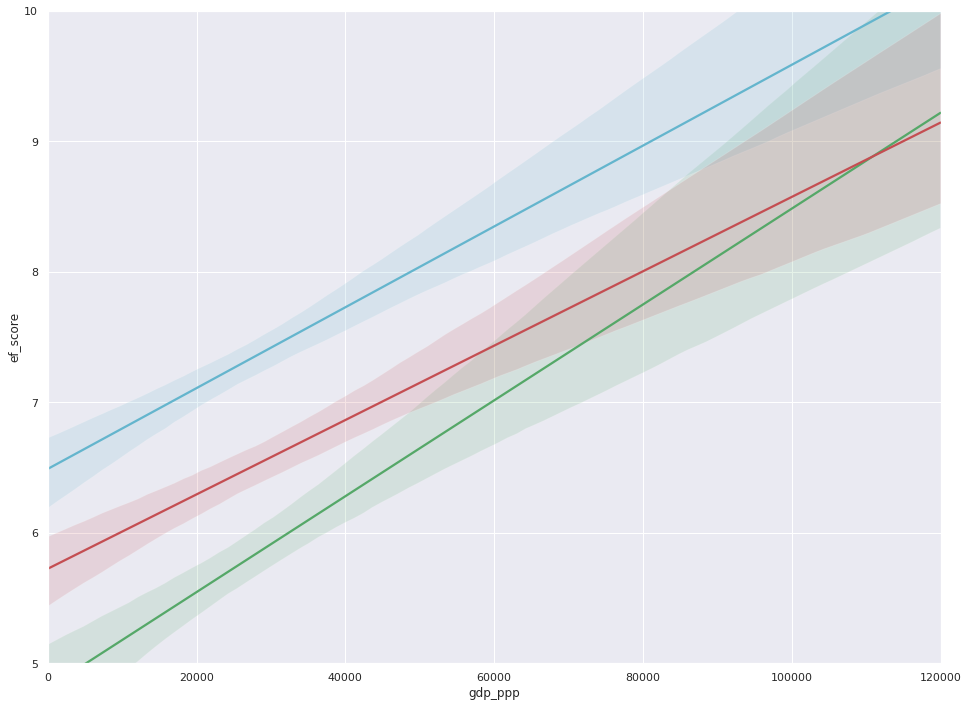

In [22]:
f, ax = plt.subplots(figsize = (16,12))
ax.set(xlim=(0, 120000), ylim=(5, 10))
sns.regplot("gdp_ppp", "h_score", data=work, color="g", label = 'Happiness', scatter=False)
sns.regplot("gdp_ppp", "hf_score", data=work, color="c", label = 'Social freedom', scatter = False)
sns.regplot("gdp_ppp", "ef_score", data=work, color="r", label = 'Economic Freedom', scatter = False)


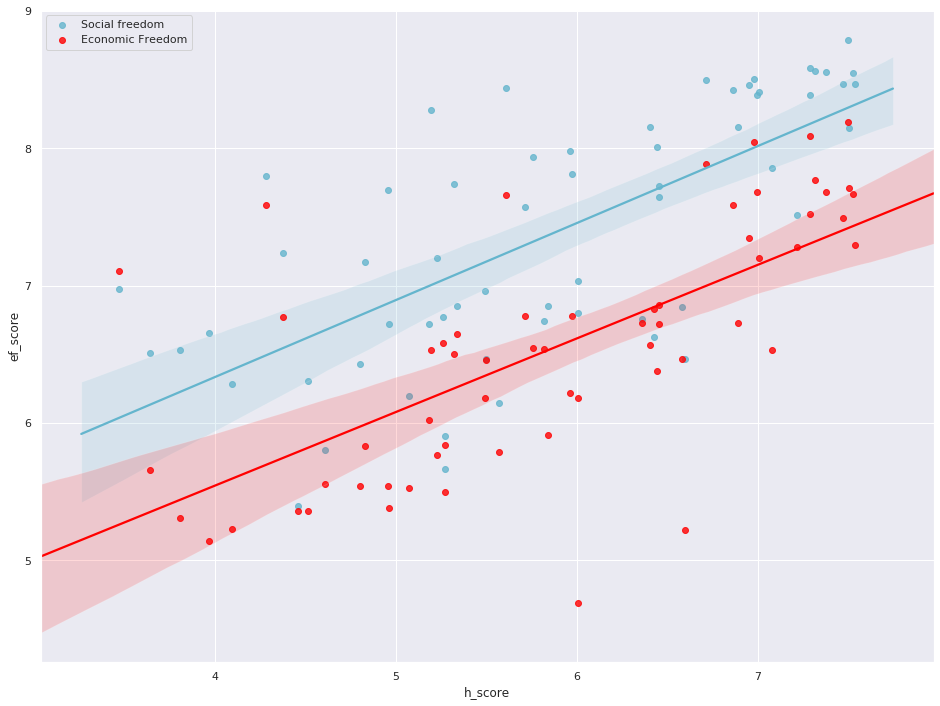

In [23]:
sns.set()
plt.figure(figsize=(16, 12))
#sns.regplot("h_score", "h_score", data=work, color="m", label = 'Happiness')
sns.regplot("h_score", "hf_score", data=work, color="c", label = 'Social freedom')
sns.regplot("h_score", "ef_score", data=work, color="red", label = 'Economic Freedom')
plt.legend()
plt.show()

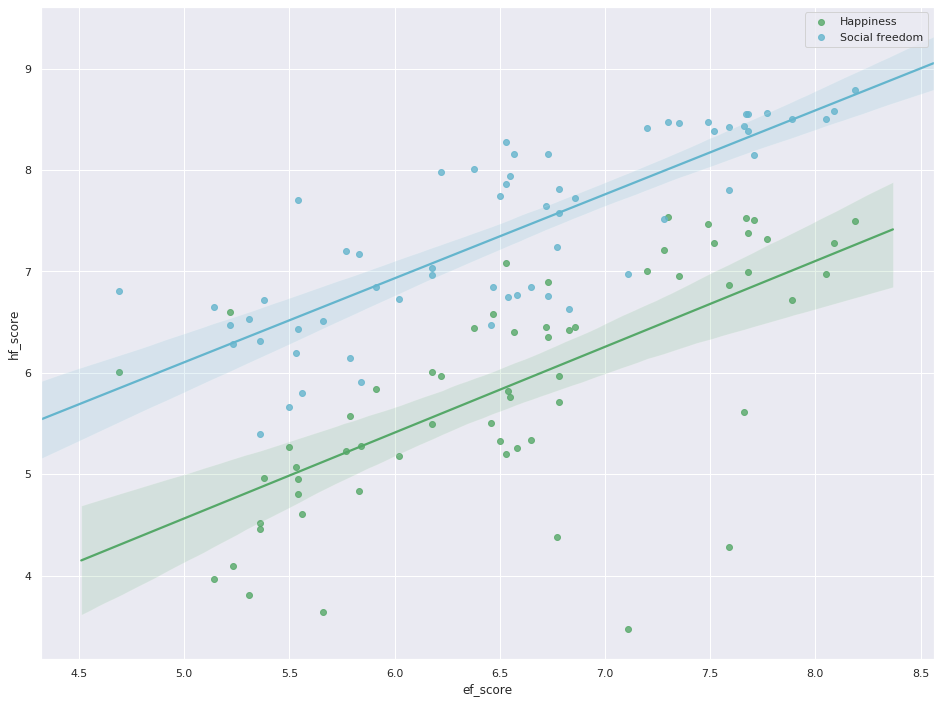

In [24]:
sns.set()
plt.figure(figsize=(16, 12))
sns.regplot("ef_score", "h_score", data=work, color="g", label = 'Happiness')
sns.regplot("ef_score", "hf_score", data=work, color="c", label = 'Social freedom')
#sns.regplot("ef_score", "ef_score", data=work, color="r", label = 'Economic Freedom')
plt.legend()
plt.show()

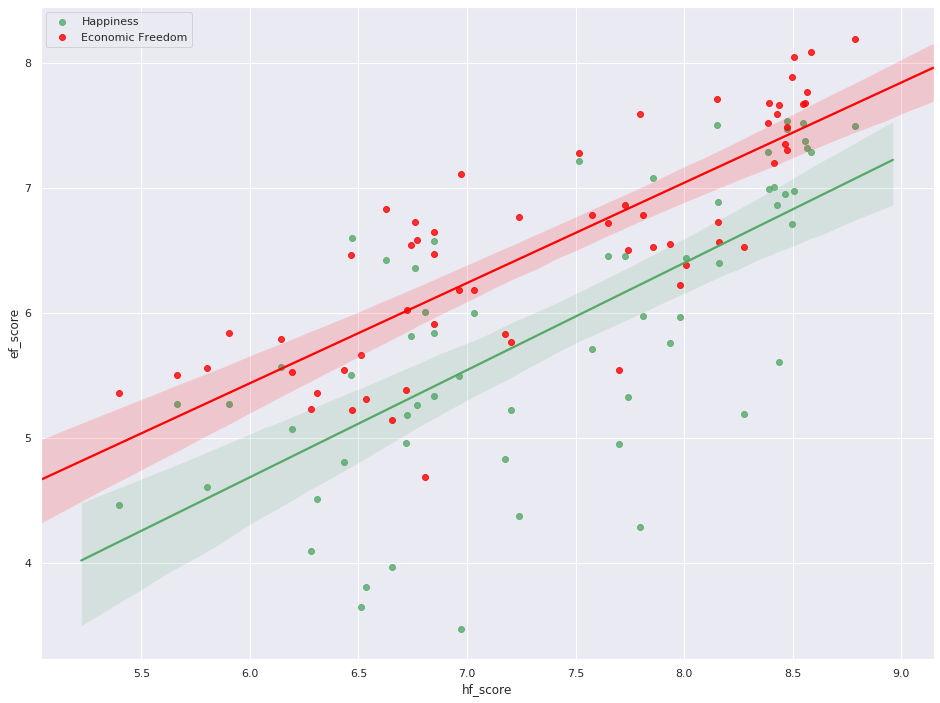

In [25]:
sns.set()
plt.figure(figsize=(16, 12))
sns.regplot("hf_score", "h_score", data=work, color="g",  label = 'Happiness')
#sns.regplot("hf_score", "hf_score", data=work, color="darkcyan", label = 'Social freedom')
sns.regplot("hf_score", "ef_score", data=work, color="red", label = 'Economic Freedom')
plt.legend()
plt.show()